In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y = make_regression(n_samples=1000, n_features=2, noise=25)
X = pd.DataFrame(data=X)
y = pd.DataFrame(data=y)

<Figure size 600x450 with 0 Axes>

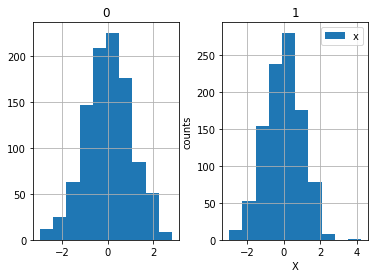

In [3]:
plt.figure(figsize=(4,3), dpi=150);
X.hist()
plt.xlabel('X')
plt.ylabel('counts')
plt.legend('x')

<Figure size 600x450 with 0 Axes>

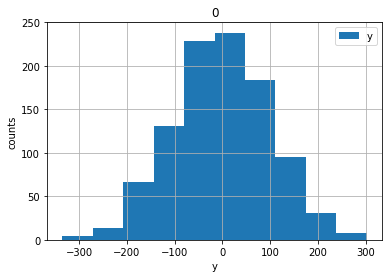

In [4]:
plt.figure(figsize=(4,3), dpi=150);
y.hist()
plt.xlabel('y');
plt.ylabel('counts');
plt.legend('y')

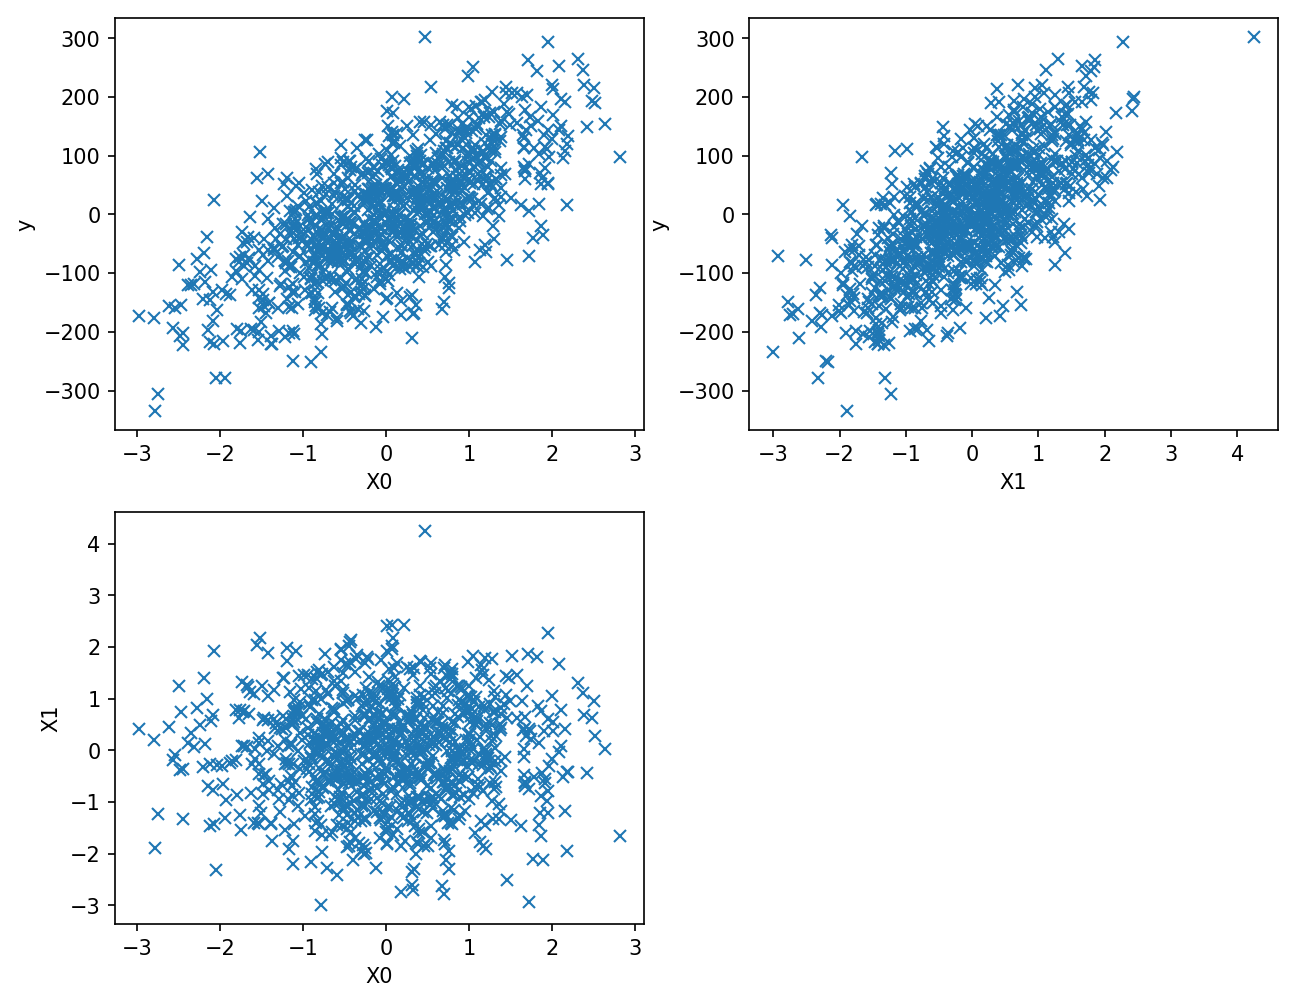

In [5]:
figure = plt.figure(figsize=(10,8), dpi=150);
ax = plt.subplot(2,2,1)
ax.plot(X[0],y,'x');
ax.set_xlabel('X0');
ax.set_ylabel('y');

ax = plt.subplot(2,2,2)
ax.plot(X[1],y,'x');
ax.set_xlabel('X1');
ax.set_ylabel('y');

ax = plt.subplot(2,2,3)
ax.plot(X[0],X[1],'x');
ax.set_xlabel('X0');
ax.set_ylabel('X1');

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
linearFit = LinearRegression()

X_train=X[:750]
y_train=y[:750]

X_test=X[750:]
y_test=y[750:]

linearFit.fit(X_train, y_train)
y_pred = linearFit.predict(X_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [8]:
print("Coefficients: \n", linearFit.coef_)

Coefficients: 
 [[66.19066468 68.6550991 ]]


In [9]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 702.21


In [10]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.93


In [11]:
linearFit.coef_[0][0]

66.1906646770491

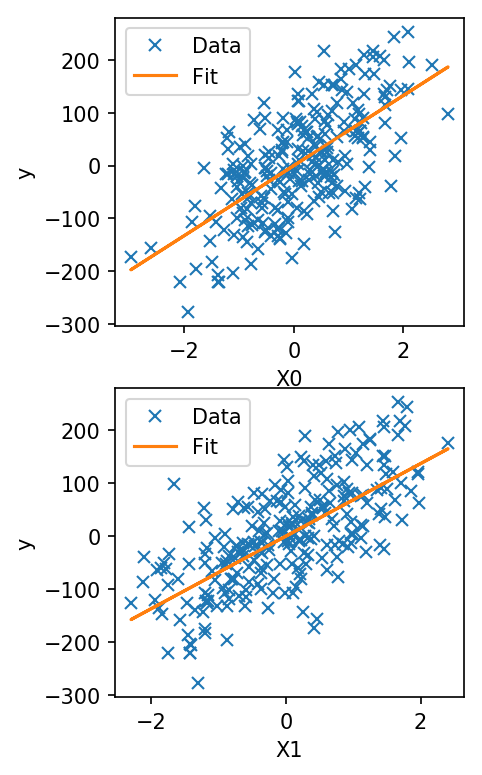

In [12]:
figure = plt.figure(figsize=(3,6), dpi=150);
ax = plt.subplot(2,1,1)
ax.plot(X_test[0],y_test,'x', X_test[0],linearFit.coef_[0][0]*X_test[0],'-');
ax.set_xlabel('X0');
ax.set_ylabel('y');
ax.legend(['Data','Fit']);

ax = plt.subplot(2,1,2)
ax.plot(X_test[1],y_test,'x', X_test[1],linearFit.coef_[0][1]*X_test[1],'-');
ax.set_xlabel('X1');
ax.set_ylabel('y');
ax.legend(['Data','Fit']);

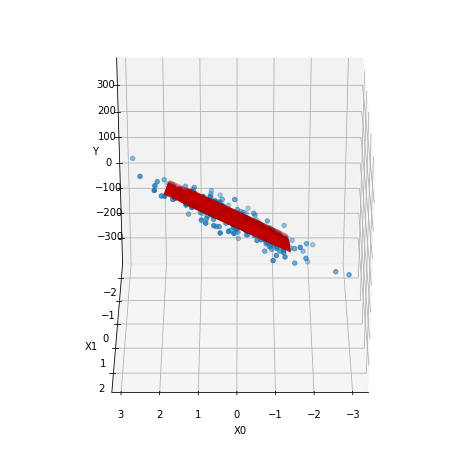

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[0],X_test[1],y_test)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')

X0mesh, X1mesh = np.meshgrid(X_test[0],X_test[1])
Z = X0mesh*linearFit.coef_[0][0] + X1mesh*linearFit.coef_[0][1]

ax.plot_surface(X0mesh,X1mesh,Z, alpha=0.1, color='r')

ax.view_init(30,90)